# Lead Score - Case Study
***
## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
***
#### Step taken to solve the problem
 <ol>
    <li>Importing</li>
    <li>Reading the Data</li>
    <li>Data Cleansing and Data Manipulation</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Preparation</li>
    <li>Model Building</li>
    <li>Prediction</li>
    <li>Model Evaluation</li>
    <li>Optimal Cut-off (ROC Curve)</li>
    <li>Precision and Recall</li>
    <li>Making Prediction on test data</li>
 </ol>

## 1. Importing Necessary Libraries
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 2. Reading the Data 
***

In [2]:
Leads = pd.read_csv('Leads.csv')
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 3. Data Cleansing and Data Manipulation
***
### 3.1 Inspecting the Dataframe

In [3]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Inferences:** 
- It seems to be null values/missing values in various cloumns like `Asymmetrique Activity Index`,`Asymmetrique Activity Score`, `Lead Quality`, `Tags` etc.

In [4]:
#Checking the Number of Rows and Columns
Leads.shape

(9240, 37)

In [5]:
#Checking the Numerical Colums Summary
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking for duplicate values
sum(Leads.duplicated(subset='Prospect ID')) ==0

True

In [7]:
#Checking for duplicate values
sum(Leads.duplicated(subset='Lead Number')) ==0

True

**Inferences:** 
- No Duplicates values in **`Prospect ID`**.
- No Duplicate values in **`Lead Number`**.
- Clearly **`Prospect ID`** and **`Lead Number`** won't be contributing in our model. Thus, we can drop them.

In [8]:
# Dropping 'Prospect ID' and 'Lead Number' column
Leads.drop(['Prospect ID','Lead Number'],axis=1, inplace=True)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 3.2 Data Manipulation
***
**Observation:** We can see that there are **`Select`** Value in various column. This is because no options were selected from the drop down list and by default select is stored as data. Thus, It is as good as null or missing value.


In [9]:
#Converting 'Select' values to NaN
Leads = Leads.replace('Select', np.nan)

In [10]:
#Checking for Null Values
Leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#Checking NULL Value Percentage
round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#Dropping Columns with Null Value Percentage >= 40%
for col in Leads.columns:
    null_percentages = round(100*(Leads[col].isnull().sum()/len(Leads[col].index)),2)
    if(null_percentages >= 40):
        print("{0} dropped ! as null % was {1}".format(col, null_percentages))
        Leads.drop(col, 1, inplace = True)

How did you hear about X Education dropped ! as null % was 78.46
Lead Quality dropped ! as null % was 51.59
Lead Profile dropped ! as null % was 74.19
Asymmetrique Activity Index dropped ! as null % was 45.65
Asymmetrique Profile Index dropped ! as null % was 45.65
Asymmetrique Activity Score dropped ! as null % was 45.65
Asymmetrique Profile Score dropped ! as null % was 45.65


In [13]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [14]:
#Checking NULL Value Percentage again
round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
#Taking a look at city column
Leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

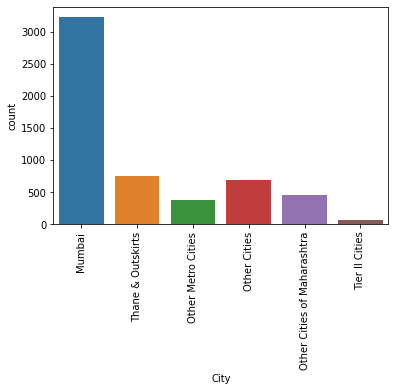

In [16]:
#plotting the City Column
sns.countplot(Leads.City)
plt.xticks(rotation=90)
plt.show()

**Inferences:** 
- Almost **58%** of data contains `Mumbai`
- We can impute the missing value in City column with `Mumbai`

In [17]:
# Imputing 'Mumbai' in missing values
Leads.City = Leads.City.replace(np.nan, 'Mumbai')

In [18]:
#Looking at Specialization column
Leads.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

**Inferences:**
- It can be a case where the Specialization is not mentioned because it was not a option in drop down as we are mostly seeing 'Management' but there can be others like Analyst, Architect, CTO, CFO etc. or does not have any Specialization or are they are students
- We Can replcae such missing value with 'Others'

In [19]:
# Imputing 'Others' in missing values 
Leads.Specialization = Leads.Specialization.replace(np.nan, 'Others')

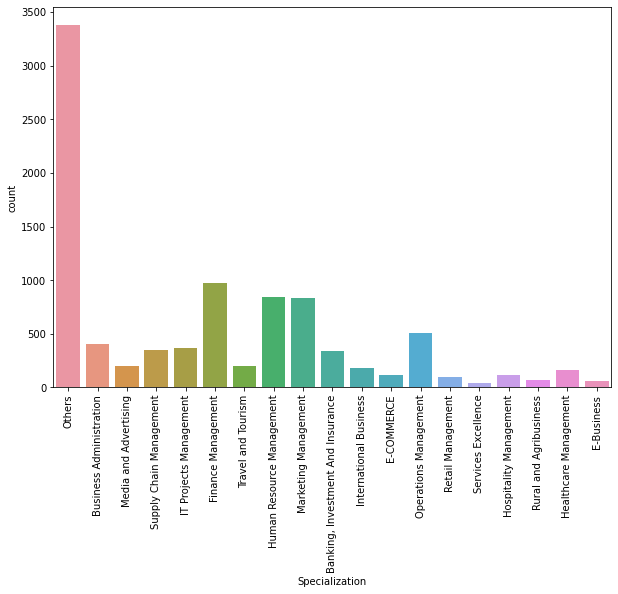

In [20]:
#plotting the Specialization Column
plt.figure(figsize=(10,7))
sns.countplot(Leads.Specialization)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Checking the 'What is your current occupation' Column
Leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**Inferences:**
- For `What is your current occupation` column, we can replace the NaN value with the most occuring one i.e. `Unemployed`

In [22]:
# Imputing 'Unemployed' in missing values
Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan,'Unemployed')

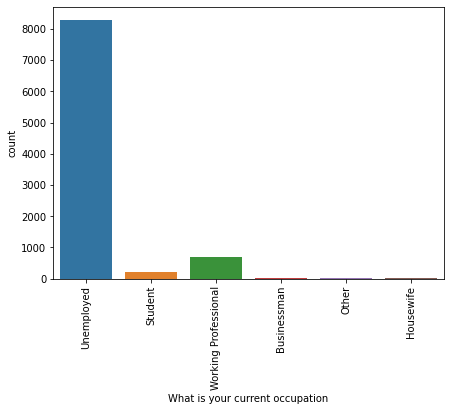

In [23]:
#Plotting the 'What is your current occupation' Column after imputing values
plt.figure(figsize=(7,5))
sns.countplot(Leads['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [24]:
# Checking the 'What matters most to you in choosing a course' column
Leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Inferences:**
 - For `What matters most to you in choosing a course` column. 
 - We can impute the NaN values with `Better Career Prospects`

In [25]:
# Imputing 'Better Career Prospects' in missing values
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

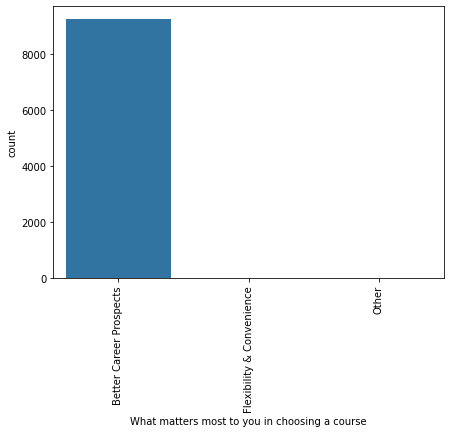

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(Leads['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [27]:
# Checking the 'Tags' Column
Leads.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

**Inferences:** 
- For this Coulmn we can replace the 'Nan' with 'Will revert after reading the email'

In [28]:
# Imputing 'Will revert after reading the email' in missing values
Leads.Tags = Leads.Tags.replace(np.nan, 'Will revert after reading the email')

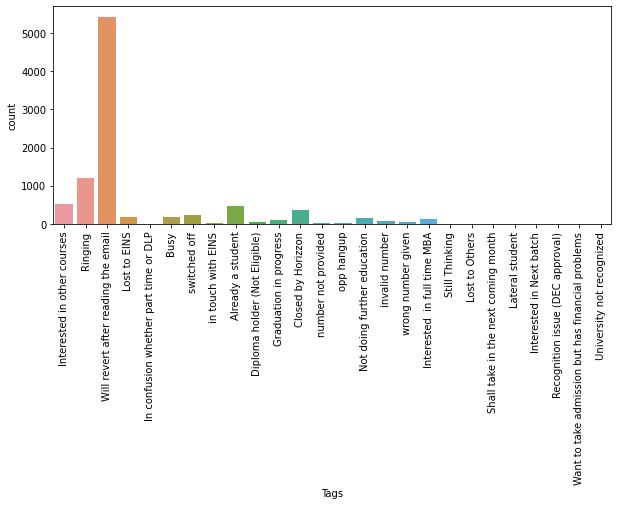

In [29]:
# Plotting 'Tags' column
plt.figure(figsize=(10,4))
sns.countplot(Leads['Tags'])
plt.xticks(rotation=90)
plt.show()

In [30]:
# Checking the 'Country' Column
Leads.Country.value_counts(dropna=False, normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
Canada                   0.043290
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Belgium                  0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Italy                    0.021645
Netherlands              0.021645
Bangladesh               0.021645
Ghana                    0.021645
Sri Lanka     

**Inferences:**
 - Majority of Country is 'India' 70% , so we can replace the NaN value with india

In [31]:
# Imputing 'India' in missing values
Leads.Country = Leads.Country.replace(np.nan,'India')

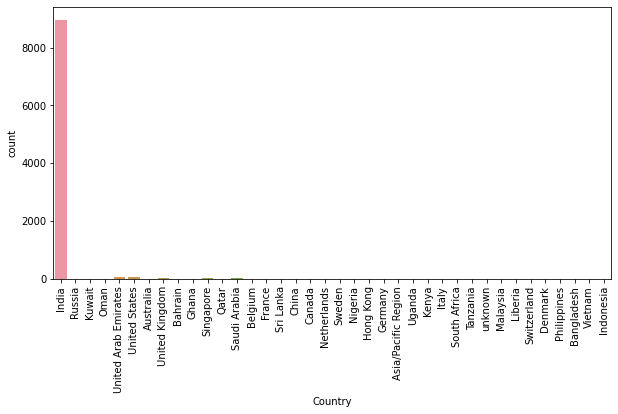

In [32]:
# Plotting 'Country' column
plt.figure(figsize=(10,5))
sns.countplot(Leads['Country'])
plt.xticks(rotation=90)
plt.show()

In [33]:
# Chekcing for null vslue percentage again
round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

**Inferences:**
 - For rest of the missing values they amount less than 2%, so if we drop them it won't affect the model

In [34]:
# Dropping all rows with NaN value
Leads = Leads.dropna()

In [35]:
# Rechecking the column
round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## 4. Exploratory Data Analysis
***
**Observation:**
 - Now the Data is Cleaned, we can proceed with EDA and see how each varibale is doing against the Target Variable `Converted`
 
### 4.1 Lead Origin

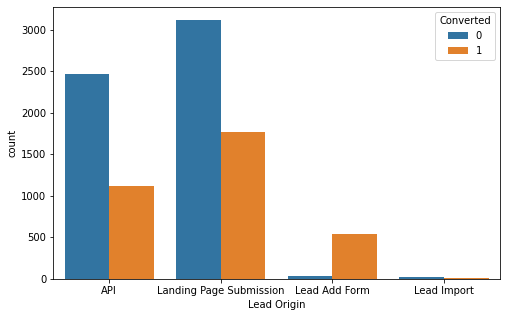

In [36]:
# Plotting Lead Origin w.r.t Converted
plt.figure(figsize=(8,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads)
plt.show()

**Inferences:**
 - Highest lead count and conversion rate is from `Landing Page Submission` followed by `API`
 - Lead Add Form has low number of lead but very high conversion rate
 - Lead Import have lowest Leads and Conversion Ratio

**Observation:** To increase the overall conversion rate, we need to increase the conversion of lead origin from **`API`** and **`Landing Page Submission`**, Also get more leads from **`Lead Add Form`**

### 4.2 Lead Source

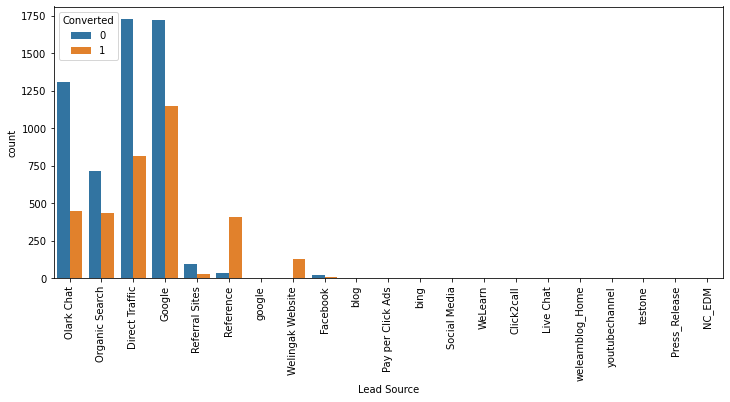

In [37]:
# Plotting Lead Source w.r.t Converted
plt.figure(figsize=(12,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

**Inferences:**
 - We can see that there are 2 entries with google and Google, so we can group them as one.

In [38]:
# Clubbing google and Google into Google
Leads['Lead Source'] = Leads['Lead Source'].replace('google','Google')

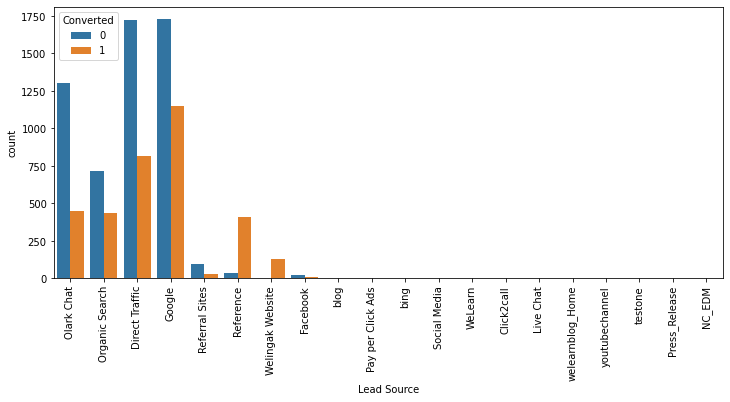

In [39]:
# Replotting Lead Source w.r.t Converted
plt.figure(figsize=(12,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

**Inferences:**
 - Google, Direct Traffic have the highest number of lead count as well as Conversion Rate followed by Olark Chat and Organic Search
 - Altough conversion rate is high for References and Welingak Website, the number are leads are quite low

**Observation:** To increase the overall conversion efficiency, we need to focus on increasing conversion of leads from Google, Direct Traffic, Olark Chat and Organic Search, while increasing the number of leads from References and Welingak Website

### 4.3 Do Not Email & Do Not Call

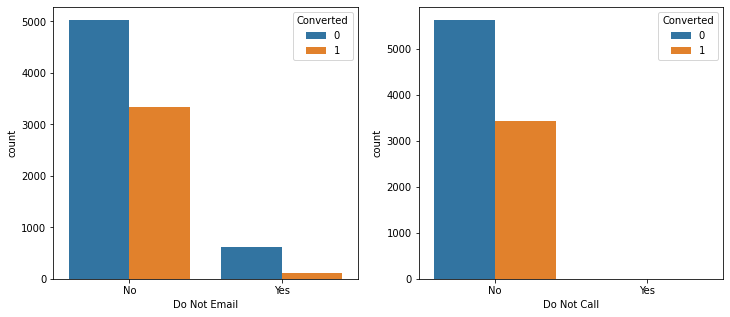

In [40]:
# Plotting 'Do Not Email' & 'Do Not Call' w.r.t. Converted
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = Leads)
plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = Leads)
plt.show()

**Inferences:**
 - People who respond to calls and email have high chances to being converted as Hot Lead
 - Do not call have most values as `No` in it so it is imbalanced and can be dropped from analysis

### 4.4 Total Visits

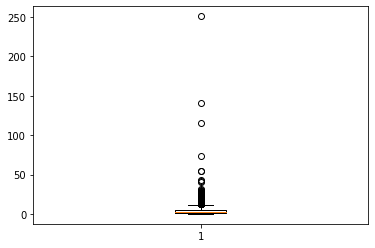

In [41]:
# Plotting 'Total Visits'
plt.figure(figsize=(6,4))
plt.boxplot(Leads.TotalVisits)
plt.show()

**Inferences:** 
 - We can see there are a lot of outliers present, we can cap the outliers at 95th percentile

In [42]:
# Soft capping of Total Visits
percentiles = Leads['TotalVisits'].quantile([0.05,0.95]).values
Leads['TotalVisits'][Leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
Leads['TotalVisits'][Leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

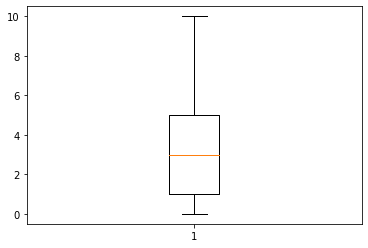

In [43]:
# Replot Total Visits columns
plt.boxplot(Leads['TotalVisits'])
plt.show()

**Inferences:**
 - Now that outliers are treated, comparing it against Target Variable

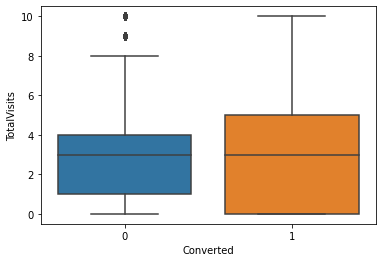

In [44]:
# Plotting Total Visits w.r.t. Converted
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads)
plt.show()

**Inferences:**
 - The Median are same for both Converted Leads and Not-Converted leads

### 4.5 Total Time Spent on Website

In [45]:
# Describing the column
Leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

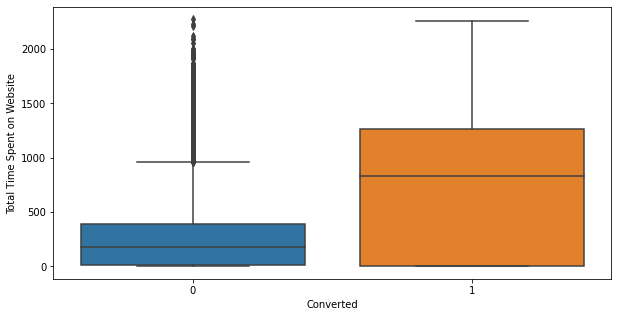

In [46]:
# Plotting the column with target variable
plt.figure(figsize=(10,5))
sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = Leads)
plt.show()

**Inferences:**
 - More time spent on Website means higher chances of conversion. Providing content of related study to various feild may result in more time spent on website and resulting in higher convertion rate

### 4.6 Page Views per Visit

In [47]:
# Describing the column
Leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

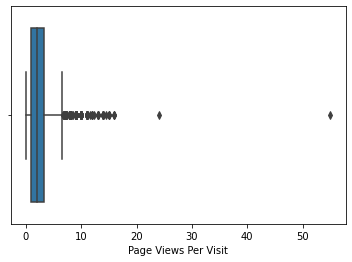

In [48]:
# Plotting to verify outlier presence as difference between 755 and max is too high
sns.boxplot(Leads['Page Views Per Visit'])
plt.show()

**Inferences:**
 - There are outliers present in `Page Views Per Visit` column. Thus, we can soft cap them

In [49]:
# Capping the outlier to 95% for further analysis
percentiles = Leads['Page Views Per Visit'].quantile([0.05,0.95]).values
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

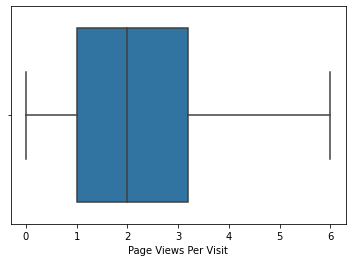

In [50]:
# Replot the column
sns.boxplot(Leads['Page Views Per Visit'])
plt.show()

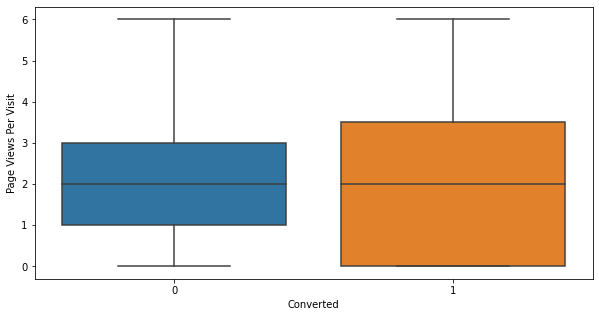

In [51]:
# Plotting it againt the Target variable
plt.figure(figsize=(10,5))
sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = Leads)
plt.show()

**Inferences:**
 - The Median for Converted and Not-Converted for 'Page Views per Visit' is same.

### 4.7 Country

In [52]:
# Checking the value counts of the columns
Leads.Country.value_counts(normalize=True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Bahrain                 0.000771
Hong Kong               0.000771
France                  0.000661
Oman                    0.000661
unknown                 0.000551
Germany                 0.000441
Canada                  0.000441
Nigeria                 0.000441
South Africa            0.000441
Kuwait                  0.000441
Sweden                  0.000331
Belgium                 0.000220
Uganda                  0.000220
China                   0.000220
Italy                   0.000220
Netherlands             0.000220
Bangladesh              0.000220
Ghana                   0.000220
Asia/Pacific Region     0.000220
Philippines             0.000220
Sri Lanka               0.000110
Denmark                 0.000110
Tanzania  

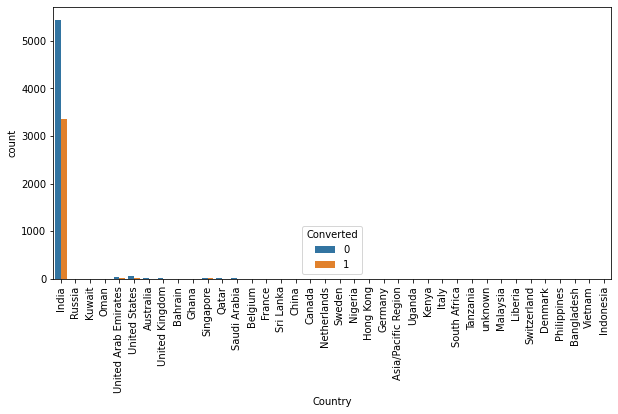

In [53]:
# Plotting 'Country' w.r.t. Converted
plt.figure(figsize=(10,5))
sns.countplot(x = 'Country', hue = 'Converted', data = Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - 97% leads are from India and around 63% are converted. 
 - This is an imbalanced variable and can be dropped from further analysis

### 4.8 Last Activity

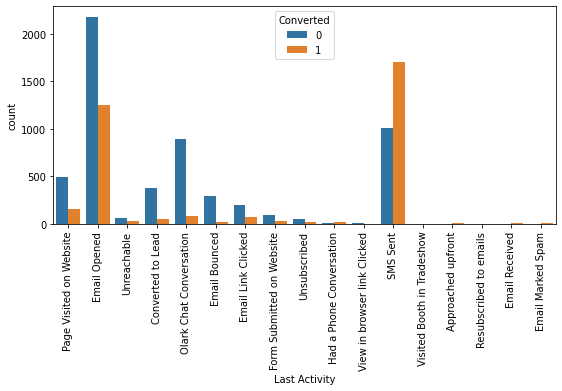

In [54]:
# Plotting 'Last Activity' w.r.t. 'Converted'
plt.figure(figsize=(9,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - Most of the people has 'Email Opened' as their Last Activity
 - People having 'SMS Sent' as their Last Activity have the highest conversion

### 4.9 Specialization

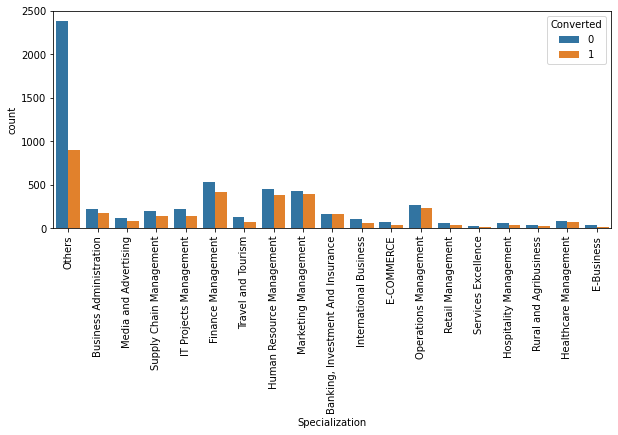

In [55]:
# Plotting 'Specialization' w.r.t. 'Converted'
plt.figure(figsize=(10,4))
sns.countplot(x = "Specialization", hue = "Converted", data = Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - Various Management and Business Specialization have high conversion rate, so more focus should be there.

### 4.10 Current Occupation

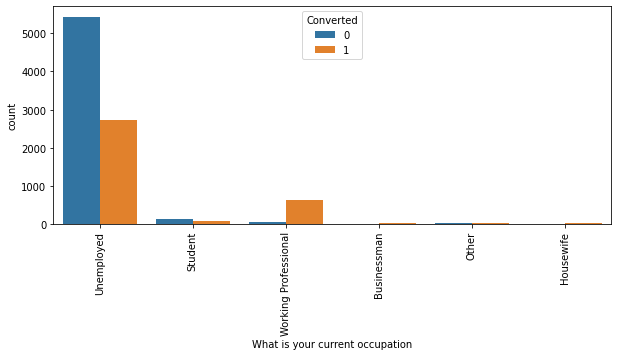

In [56]:
# Plotting 'What is your current occupation' w.r.t. 'Converted'
plt.figure(figsize=(10,4))
sns.countplot(x = 'What is your current occupation', hue = "Converted", data = Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - Unemployed has highest number of leads but low conversion rate as compare to Working Professional who has low number of lead but high conversion rate

### 4.11 Choosing a Course

In [57]:
# Checking the value count of the column
Leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

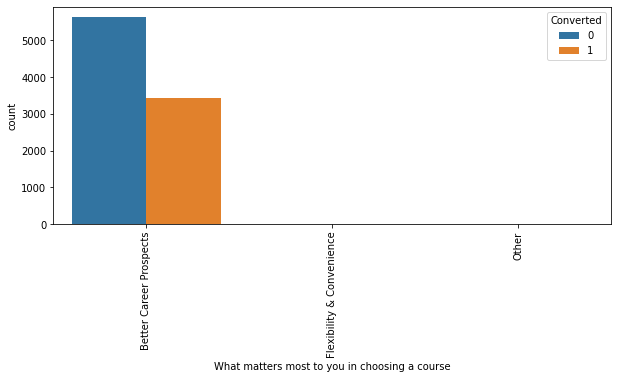

In [58]:
# Plotting it against target variable
plt.figure(figsize=(10,4))
sns.countplot(x = 'What matters most to you in choosing a course' , hue = "Converted", data = Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - 99% data is for 'Better Career prospect'.
 - This is also an Imbalanced variable and can be dropped.

<h3> 4.12
    <ul>
        <li>Search, Magzine</li>
        <li>Newspaper Article</li>
        <li>X Education Forum</li>
        <li>Newspaper</li>
        <li>Digital Advertisement</li>
        <li>Through Recommendations</li>
        <li>Receive More Updates About Our Courses</li>
    </ul>
</h3>

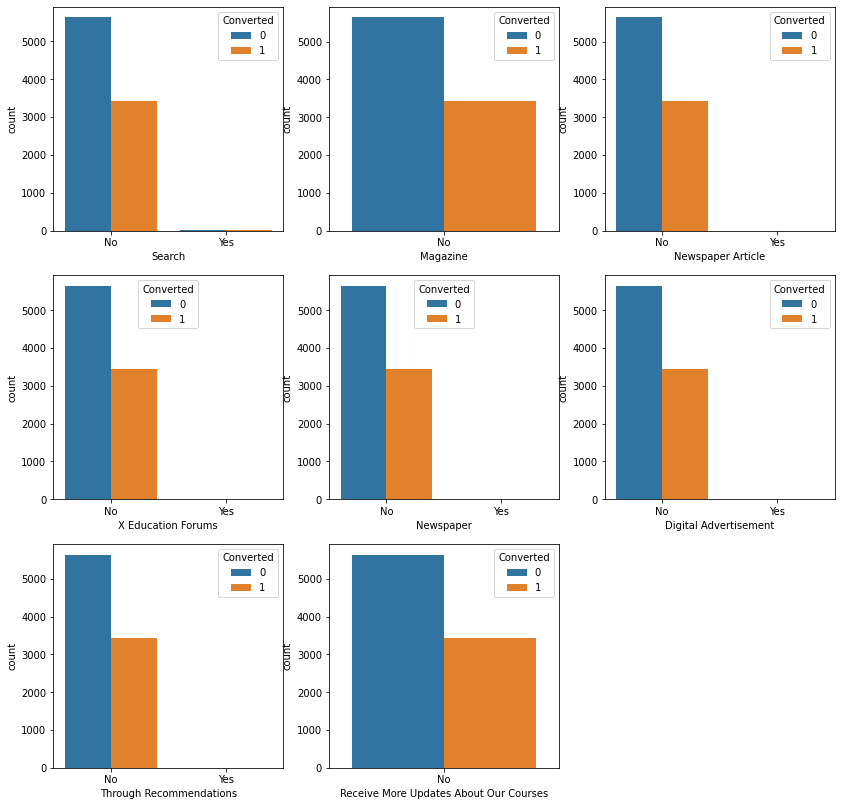

In [59]:
# Plotting coulmns w.r.t. target variable
plt.figure(figsize=(14,14))
plt.subplot(3,3,1)
sns.countplot(x = "Search", hue = "Converted", data = Leads)
plt.subplot(3,3,2)
sns.countplot(x = "Magazine", hue = "Converted", data = Leads)
plt.subplot(3,3,3)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Leads)
plt.subplot(3,3,4)
sns.countplot(x = "X Education Forums", hue = "Converted", data = Leads)
plt.subplot(3,3,5)
sns.countplot(x = "Newspaper", hue = "Converted", data = Leads)
plt.subplot(3,3,6)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Leads)
plt.subplot(3,3,7)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Leads)
plt.subplot(3,3,8)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Leads)
plt.show()

**Inferences:**
  - All of them are Imbalanced variables that have more than 99% of data entries as `NO` and can be dropped for further analysis

### 4.13 Tags

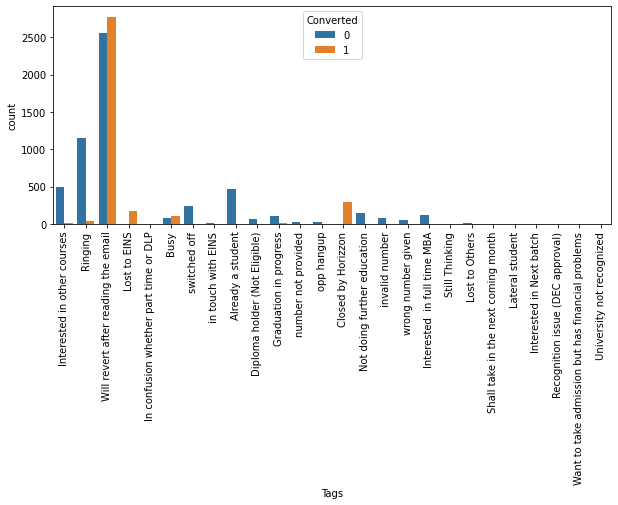

In [60]:
# Plotting 'Tag' w.r.t. target variable
plt.figure(figsize=(10,4))
sns.countplot(x = 'Tags' , hue = "Converted", data = Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - People with 'will revert after reading the email' Tag have the highest Conversion rate
 - More focus should be put on 'Ringing' and 'Interested in other courses' to get more conversion

<h3>4.14
    <ul>
        <li>Update me on Supply Chain Content</li>
        <li>Get updates on DM Content</li>
        <li>I agree to pay the amount through cheque</li>
        <li>A free copy of Mastering The Interview</li>
    </ul>
</h3>

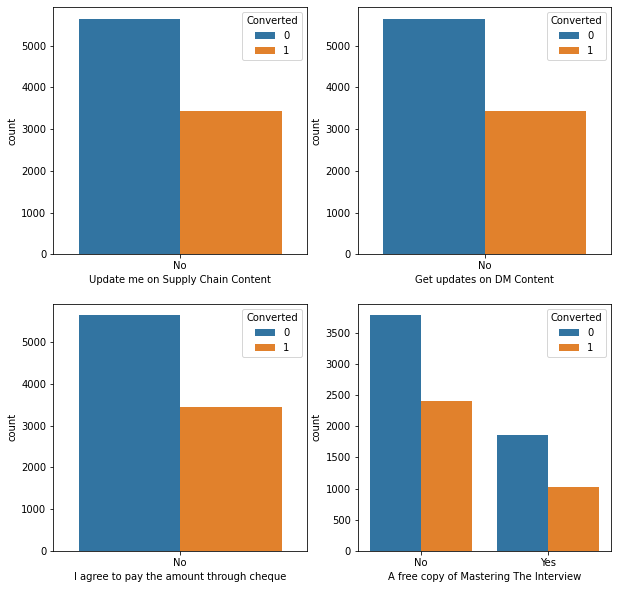

In [61]:
# Plotting columns against target variable
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Leads)
plt.subplot(2,2,2)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Leads)
plt.subplot(2,2,3)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Leads)
plt.subplot(2,2,4)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Leads)
plt.show()

**Inferences:**
 - These are the imbalanced columns with most entries a `NO`. 
 - They are imbalanced and won't be contributing to max hot leads, so they can be droppedfrom further analysis

### 4.15 City

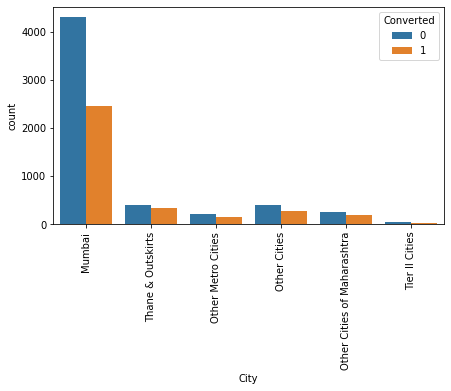

In [62]:
# Plotting 'City' w.r.t. target variable
plt.figure(figsize=(7,4))
sns.countplot(x='City', hue='Converted', data=Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - Most of the Leads are from Mumbai with 35% conversion rate

### 4.16 Last Notable Activity

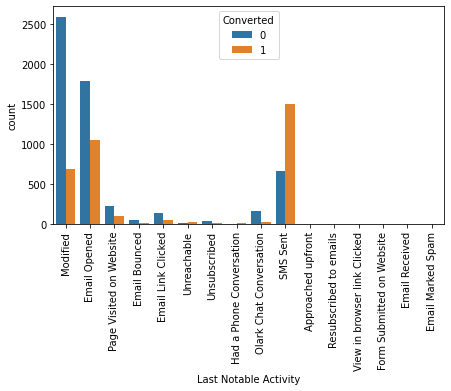

In [63]:
# Plotting 'Last Notable Activity' w.r.t. target variable
plt.figure(figsize=(7,4))
sns.countplot(x='Last Notable Activity', hue='Converted', data=Leads)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
 - Sending SMS is a effective way for Lead Conversion, more focus should be made on that
 - People with 'Email Opened' as last notablea ctivity have high lead conversion rate as well
 - Modified has high lead count but low conversion rate.

 - **Dropping columns which are not contributing from further analysis**

In [64]:
# Dropping columns
Leads.drop(['Do Not Call',
            'What matters most to you in choosing a course',
            'Search',
            'Magazine',
            'Newspaper Article',
            'X Education Forums',
            'Newspaper',
            'Digital Advertisement',
            'Through Recommendations',
            'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content',
            'Get updates on DM Content',
            'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview',
            'Country'], axis=1, inplace=True)

In [65]:
# Checking the shape
Leads.shape

(9074, 13)

In [66]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


## 5. Data Preparation
***

### 5.1 Dummy variable

In [67]:
# Converting the single response 'Yes' or 'No' to Binary variable
Bin_var = ['Do Not Email']

def var_map(x):
    return x.map({'Yes':1,'No':0})

Leads[Bin_var] = Leads[Bin_var].apply(var_map) 

In [68]:
# Creating Dummy variable for the Categorical Columns
cat_var = Leads[['Lead Origin',
                 'Lead Source',
                 'Last Activity',
                 'Specialization',
                 'What is your current occupation',
                 'Tags',
                 'City',
                 'Last Notable Activity']]

Leads_dummie = pd.get_dummies(cat_var, drop_first=True)
Leads_dummie.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# Merging the dummies with origin dataframe
Leads = pd.concat([Leads,Leads_dummie], axis=1)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [70]:
# Dropping the redundant columns
Leads = Leads.drop(['Lead Origin', 
                    'Lead Source',
                    'Last Activity',
                    'Specialization',
                    'What is your current occupation',
                    'Tags',
                    'City',
                    'Last Notable Activity'],axis=1)
Leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 5.2 Splitting Data

In [71]:
# Checking the data type before proceeding to Train-Test Split and Model Building
Leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 111 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   Do Not Email                                            int64  
 1   Converted                                               int64  
 2   TotalVisits                                             float64
 3   Total Time Spent on Website                             int64  
 4   Page Views Per Visit                                    float64
 5   Lead Origin_Landing Page Submission                     uint8  
 6   Lead Origin_Lead Add Form                               uint8  
 7   Lead Origin_Lead Import                                 uint8  
 8   Lead Source_Direct Traffic                              uint8  
 9   Lead Source_Facebook                                    uint8  
 10  Lead Source_Google                                      uin

#### Splitting the Data into Train and Test Set

In [72]:
# Putting the Response Variable to y
y = Leads['Converted']

# Putting the feature variable to X
X = Leads.drop('Converted', axis=1) 

In [73]:
# Splitting the data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### 5.3 Scaling the Data

In [74]:
# Initializing Standard Scaler Variable
Scaler =StandardScaler()

# Scaling
X_train[['TotalVisits',
         'Total Time Spent on Website',
         'Page Views Per Visit']] = Scaler.fit_transform(X_train[['TotalVisits',
                                                                  'Total Time Spent on Website',
                                                                  'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


**Observation:** 
 - As per problem statement given, we are provided that typical lead conversion rate is about 30%. <br>
Now, let's check what is the conversion rate is for the provided data

In [75]:
# Checking the conversion rate
Conversion_rate = (Leads.Converted.sum()/len(Leads.Converted.index))*100
Conversion_rate

37.85541106458012

## 6. Model Building
***
### 6.1 Model 1

In [76]:
# BUILDING MODEL #1
Model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                          107
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1539.2
Date:                Mon, 11 Jan 2021   Deviance:                       3078.5
Time:                        23:37:32   Pearson chi2:                 1.23e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     27.1856   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.6530      0.298     -5.540      0.000      -2.238      -1.068
TotalVisits                                                0.1410      0.077      1.839      0.066      -0.009       0.291
Total Time Spent on Website                                1.1786      0.057     20.623      0.000       1.067       1.291
Page Views Per Visit                                      -0.2332      0.085     -2.753      0.006      -0.399      -0.067
Lead Origin_Landing Page Submission                       -1.2339      0.188     -6.573      0.000      -1.602      -0.866
Lead Origin_Lead Add Form                                 -3.7780      3.269     -1.156      0.248     -10.185       2.629
Lead Origin_Lead Import                                   28.2811   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                -6.2496      3.829     -1.632      0.103     -13.755       1.256
Lead Source_Facebook                                     -33.1454   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                        -6.0569      3.829     -1.582      0.114     -13.561       1.447
Lead Source_Live Chat                                     22.4652   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Lead Source_NC_EDM                                        18.7848   2.16e+05    8.7e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                    -5.3556      3.822     -1.401      0.161     -12.846       2.135
Lead Source_Organic Search                                -6.0289      3.831     -1.574      0.116     -13.538       1.481
Lead Source_Pay per Click Ads                            -25.1629   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -29.8063   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                      0.3974      1.999      0.199      0.842      -3.521       4.316
Lead Source_Referral Sites                                -6.2417      3.850     -1.621      0.105     -13.788       1.304
Lead Source_Social Media                                  -3.1179      4.877     -0.639      0.523     -12.677       6.441
Lead Source_WeLearn                                     4.761e-09   4.57e-05      0.000      1.000   -8.95e-05    8.95e-05
Lead Source_Welingak Website                               2.4979      2.119      1.179      0.238      -1.655       6.650
Lead Sou

**Inferences:** 
 - This is our initial model with all the variables and we can see that the P-Values of many varibales is too high, so we will move ahead and build another model using RFE

### 6.2 Feature selection using RFE

In [77]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([ True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 57),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 55),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 71),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 62),
 ('Lead Source_NC_EDM', False, 46),
 ('Lead Source_Olark Chat', False, 40),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 89),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 91),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 85),
 ('Lead Source_blog', False, 23),
 ('Lead Source_testone', False, 88),
 ('Lead Source_welearnblog_Home', False, 33),
 ('L

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Websi

In [82]:
X_train[col].head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_SMS Sent
3009,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1012,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
9226,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4750,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
7987,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### 6.3 Model 2

In [83]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
Model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.7
Date:                Mon, 11 Jan 2021   Deviance:                       3881.4
Time:                        23:37:44   Pearson chi2:                 1.10e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1419      0.337     -3.385      0.001      -1.803      -0.481
Do Not Email                                            -1.8229      0.210     -8.691      0.000      -2.234      -1.412
Lead Origin_Landing Page Submission                     -1.3932      0.149     -9.348      0.000      -1.685      -1.101
Lead Origin_Lead Add Form                                1.6836      0.322      5.227      0.000       1.052       2.315
Lead Source_Welingak Website                             2.7001      0.810      3.335      0.001       1.113       4.287
Last Activity_Had a Phone Conversation                   2.7748      1.014      2.738      0.006       0.788       4.761
Last Activity_Unsubscribed                               2.6022      0.549      4.736      0.000       1.525       3.679
Specialization_Others                                   -2.0950      0.152    -13.813      0.000      -2.392      -1.798
What is your current occupation_Unemployed              -1.7460      0.308     -5.666      0.000      -2.350      -1.142
What is your current occupation_Working Professional     0.9361      0.381      2.454      0.014       0.189       1.684
Tags_Busy                                                2.9904      0.320      9.342      0.000       2.363       3.618
Tags_Closed by Horizzon                                  8.4030      0.749     11.223      0.000       6.935       9.871
Tags_Interested in Next batch                           26.8154   5.39e+04      0.000      1.000   -1.06e+05    1.06e+05
Tags_Lateral student                                    28.4714    7.6e+04      0.000      1.000   -1.49e+05    1.49e+05
Tags_Lost to EINS                                        8.3612      0.751     11.127      0.000       6.889       9.834
Tags_Ringing                                            -1.2098      0.332     -3.649      0.000      -1.860      -0.560
Tags_Will revert after reading the email                 3.7461      0.222     16.869      0.000       3.311       4.181
Tags_invalid number                                    -21.6654   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Tags_switched off                                       -1.1039      0.570     -1.937      0.053      -2.221       0.013
Tags_wrong number given                                -21.5113   1.98e+04     -0.001      0.999   -3.89e+04    3.88e+04
Last Notable Activity_SMS Sent                           2.8786      0.116     24.709      0.000       2.650       3.107
========================================================================================================================
"""

**Inferences:**
 - We can see that the P-value of `Tags_Interested in Next batch` is very high so we can drop this column from the model and build again

In [84]:
# Dropping column with high p-value
col = col.drop('Tags_Interested in Next batch',1)

### 6.4 Model 3

In [85]:
# BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
Model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1947.0
Date:                Mon, 11 Jan 2021   Deviance:                       3893.9
Time:                        23:37:44   Pearson chi2:                 1.09e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0835      0.331     -3.277      0.001      -1.732      -0.436
Do Not Email                                            -1.7855      0.208     -8.583      0.000      -2.193      -1.378
Lead Origin_Landing Page Submission                     -1.3948      0.148     -9.407      0.000      -1.685      -1.104
Lead Origin_Lead Add Form                                1.6838      0.321      5.253      0.000       1.056       2.312
Lead Source_Welingak Website                             2.6881      0.808      3.326      0.001       1.104       4.272
Last Activity_Had a Phone Conversation                   2.7798      1.014      2.742      0.006       0.793       4.767
Last Activity_Unsubscribed                               2.5625      0.547      4.688      0.000       1.491       3.634
Specialization_Others                                   -2.0937      0.151    -13.867      0.000      -2.390      -1.798
What is your current occupation_Unemployed              -1.7011      0.303     -5.615      0.000      -2.295      -1.107
What is your current occupation_Working Professional     0.9576      0.376      2.544      0.011       0.220       1.695
Tags_Busy                                                2.8746      0.313      9.174      0.000       2.260       3.489
Tags_Closed by Horizzon                                  8.2993      0.746     11.129      0.000       6.838       9.761
Tags_Lateral student                                    28.3634   7.59e+04      0.000      1.000   -1.49e+05    1.49e+05
Tags_Lost to EINS                                        8.2555      0.748     11.032      0.000       6.789       9.722
Tags_Ringing                                            -1.3340      0.324     -4.112      0.000      -1.970      -0.698
Tags_Will revert after reading the email                 3.6394      0.212     17.165      0.000       3.224       4.055
Tags_invalid number                                    -21.7879   1.46e+04     -0.001      0.999   -2.86e+04    2.86e+04
Tags_switched off                                       -1.2299      0.566     -2.174      0.030      -2.339      -0.121
Tags_wrong number given                                -21.6359   1.98e+04     -0.001      0.999   -3.88e+04    3.88e+04
Last Notable Activity_SMS Sent                           2.9031      0.117     24.873      0.000       2.674       3.132
========================================================================================================================
"""

**Inferences:**
 - We can see that the P-value of `Tags_Lateral student` is very high so we can drop this column from the model and build again

In [86]:
# Dropping column with high p-value
col = col.drop('Tags_Lateral student',1)

### 6.5 Model 4

In [87]:
# BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
Model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.6
Date:                Mon, 11 Jan 2021   Deviance:                       3905.2
Time:                        23:37:45   Pearson chi2:                 1.09e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0588      0.327     -3.237      0.001      -1.700      -0.418
Do Not Email                                            -1.7873      0.208     -8.594      0.000      -2.195      -1.380
Lead Origin_Landing Page Submission                     -1.3837      0.148     -9.375      0.000      -1.673      -1.094
Lead Origin_Lead Add Form                                1.7348      0.319      5.433      0.000       1.109       2.361
Lead Source_Welingak Website                             2.6340      0.808      3.261      0.001       1.051       4.217
Last Activity_Had a Phone Conversation                   2.7819      1.014      2.745      0.006       0.795       4.768
Last Activity_Unsubscribed                               2.5596      0.545      4.695      0.000       1.491       3.628
Specialization_Others                                   -2.0768      0.150    -13.818      0.000      -2.371      -1.782
What is your current occupation_Unemployed              -1.6734      0.300     -5.581      0.000      -2.261      -1.086
What is your current occupation_Working Professional     0.9718      0.373      2.603      0.009       0.240       1.704
Tags_Busy                                                2.8106      0.310      9.075      0.000       2.204       3.418
Tags_Closed by Horizzon                                  8.2308      0.744     11.061      0.000       6.772       9.689
Tags_Lost to EINS                                        8.1899      0.747     10.967      0.000       6.726       9.654
Tags_Ringing                                            -1.4036      0.321     -4.377      0.000      -2.032      -0.775
Tags_Will revert after reading the email                 3.5739      0.207     17.298      0.000       3.169       3.979
Tags_invalid number                                    -21.8528   1.46e+04     -0.001      0.999   -2.86e+04    2.86e+04
Tags_switched off                                       -1.2953      0.564     -2.298      0.022      -2.400      -0.191
Tags_wrong number given                                -21.7007   1.98e+04     -0.001      0.999   -3.88e+04    3.88e+04
Last Notable Activity_SMS Sent                           2.9050      0.117     24.909      0.000       2.676       3.134
========================================================================================================================
"""

In [88]:
# Dropping column with high p-value
col = col.drop('Tags_invalid number',1)

### 6.6 Model 5

In [89]:
# BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col])
Model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Model_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1957.0
Date:                Mon, 11 Jan 2021   Deviance:                       3914.0
Time:                        23:37:45   Pearson chi2:                 1.11e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1312      0.334     -3.391      0.001      -1.785      -0.477
Do Not Email                                            -1.7832      0.208     -8.591      0.000      -2.190      -1.376
Lead Origin_Landing Page Submission                     -1.4025      0.148     -9.462      0.000      -1.693      -1.112
Lead Origin_Lead Add Form                                1.7478      0.321      5.452      0.000       1.119       2.376
Lead Source_Welingak Website                             2.6167      0.808      3.239      0.001       1.033       4.200
Last Activity_Had a Phone Conversation                   2.7792      1.013      2.745      0.006       0.794       4.764
Last Activity_Unsubscribed                               2.5527      0.545      4.687      0.000       1.485       3.620
Specialization_Others                                   -2.0879      0.151    -13.829      0.000      -2.384      -1.792
What is your current occupation_Unemployed              -1.7417      0.305     -5.708      0.000      -2.340      -1.144
What is your current occupation_Working Professional     0.9380      0.380      2.468      0.014       0.193       1.683
Tags_Busy                                                2.9836      0.306      9.744      0.000       2.384       3.584
Tags_Closed by Horizzon                                  8.3855      0.744     11.273      0.000       6.928       9.843
Tags_Lost to EINS                                        8.3459      0.746     11.181      0.000       6.883       9.809
Tags_Ringing                                            -1.2211      0.316     -3.858      0.000      -1.841      -0.601
Tags_Will revert after reading the email                 3.7316      0.205     18.213      0.000       3.330       4.133
Tags_switched off                                       -1.1094      0.561     -1.978      0.048      -2.209      -0.010
Tags_wrong number given                                -20.5175    1.2e+04     -0.002      0.999   -2.36e+04    2.36e+04
Last Notable Activity_SMS Sent                           2.8728      0.115     25.026      0.000       2.648       3.098
========================================================================================================================
"""

In [90]:
# Dropping column with high p-value
col = col.drop('Tags_wrong number given',1)

### 6.7 Model 6

In [91]:
# BUILDING MODEL #6
X_train_sm = sm.add_constant(X_train[col])
Model_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Model_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1958.8
Date:                Mon, 11 Jan 2021   Deviance:                       3917.6
Time:                        23:37:45   Pearson chi2:                 1.13e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1606      0.336     -3.450      0.001      -1.820      -0.501
Do Not Email                                            -1.7848      0.207     -8.611      0.000      -2.191      -1.379
Lead Origin_Landing Page Submission                     -1.4107      0.149     -9.500      0.000      -1.702      -1.120
Lead Origin_Lead Add Form                                1.7529      0.321      5.458      0.000       1.123       2.382
Lead Source_Welingak Website                             2.6103      0.808      3.230      0.001       1.026       4.194
Last Activity_Had a Phone Conversation                   2.7783      1.012      2.745      0.006       0.794       4.762
Last Activity_Unsubscribed                               2.5598      0.546      4.690      0.000       1.490       3.629
Specialization_Others                                   -2.0921      0.151    -13.830      0.000      -2.389      -1.796
What is your current occupation_Unemployed              -1.7695      0.307     -5.757      0.000      -2.372      -1.167
What is your current occupation_Working Professional     0.9245      0.383      2.415      0.016       0.174       1.675
Tags_Busy                                                3.0540      0.305     10.018      0.000       2.456       3.651
Tags_Closed by Horizzon                                  8.4488      0.744     11.360      0.000       6.991       9.906
Tags_Lost to EINS                                        8.4098      0.746     11.269      0.000       6.947       9.873
Tags_Ringing                                            -1.1475      0.315     -3.644      0.000      -1.765      -0.530
Tags_Will revert after reading the email                 3.7958      0.204     18.589      0.000       3.396       4.196
Tags_switched off                                       -1.0343      0.560     -1.847      0.065      -2.132       0.063
Last Notable Activity_SMS Sent                           2.8608      0.114     25.055      0.000       2.637       3.085
========================================================================================================================
"""

**Inferences:**
 - The P-vale of `Tags-switched off` column is more than 0.05, so we can drop and build another model

In [92]:
# Dropping column with high p-value
col = col.drop('Tags_switched off',1)

### 6.8 Model 7

In [93]:
# BUILDING MODEL #7
X_train_sm = sm.add_constant(X_train[col])
Model_7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Model_7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1960.9
Date:                Mon, 11 Jan 2021   Deviance:                       3921.8
Time:                        23:37:45   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2481      0.343     -3.639      0.000      -1.920      -0.576
Do Not Email                                            -1.7860      0.207     -8.640      0.000      -2.191      -1.381
Lead Origin_Landing Page Submission                     -1.4290      0.149     -9.580      0.000      -1.721      -1.137
Lead Origin_Lead Add Form                                1.7699      0.323      5.485      0.000       1.137       2.402
Lead Source_Welingak Website                             2.5919      0.809      3.205      0.001       1.007       4.177
Last Activity_Had a Phone Conversation                   2.7752      1.012      2.744      0.006       0.793       4.758
Last Activity_Unsubscribed                               2.5711      0.548      4.690      0.000       1.497       3.645
Specialization_Others                                   -2.1049      0.152    -13.850      0.000      -2.403      -1.807
What is your current occupation_Unemployed              -1.8450      0.313     -5.899      0.000      -2.458      -1.232
What is your current occupation_Working Professional     0.8870      0.391      2.270      0.023       0.121       1.653
Tags_Busy                                                3.2487      0.294     11.065      0.000       2.673       3.824
Tags_Closed by Horizzon                                  8.6258      0.741     11.645      0.000       7.174      10.078
Tags_Lost to EINS                                        8.5887      0.743     11.555      0.000       7.132      10.045
Tags_Ringing                                            -0.9443      0.303     -3.118      0.002      -1.538      -0.351
Tags_Will revert after reading the email                 3.9761      0.192     20.699      0.000       3.600       4.353
Last Notable Activity_SMS Sent                           2.8295      0.112     25.196      0.000       2.609       3.050
========================================================================================================================
"""

### 6.9 VIF
Check for the VIF values of the feature variables

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df[col].columns
    vif['VIF'] = [variance_inflation_factor(df[col].values, i) for i in range(df[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

VIF(X_train)

,Features,VIF
7,What is your current occupation_Unemployed,10.61
1,Lead Origin_Landing Page Submission,5.29
13,Tags_Will revert after reading the email,4.01
6,Specialization_Others,3.76
2,Lead Origin_Lead Add Form,1.82
8,What is your current occupation_Working Profes...,1.82
12,Tags_Ringing,1.69
14,Last Notable Activity_SMS Sent,1.49
3,Lead Source_Welingak Website,1.38
10,Tags_Closed by Horizzon,1.29


**Inferences:**
 - Model_7 have good P-Value but some variable have correlarion so we are getting high VIF, dropping column with high VIF.

In [95]:
# Dropping column
col = col.drop('What is your current occupation_Unemployed',1)

### 6.10 Model 8

In [96]:
# BUILDING MODEL #8
X_train_sm = sm.add_constant(X_train[col])
Final_Model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = Final_Model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.2
Date:                Mon, 11 Jan 2021   Deviance:                       3958.3
Time:                        23:37:45   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9333      0.216    -13.576      0.000      -3.357      -2.510
Do Not Email                                            -1.7896      0.205     -8.713      0.000      -2.192      -1.387
Lead Origin_Landing Page Submission                     -1.4186      0.149     -9.517      0.000      -1.711      -1.126
Lead Origin_Lead Add Form                                1.7946      0.319      5.629      0.000       1.170       2.419
Lead Source_Welingak Website                             2.5551      0.807      3.166      0.002       0.973       4.137
Last Activity_Had a Phone Conversation                   2.7363      1.013      2.702      0.007       0.751       4.722
Last Activity_Unsubscribed                               2.5248      0.545      4.629      0.000       1.456       3.594
Specialization_Others                                   -2.1256      0.152    -13.969      0.000      -2.424      -1.827
What is your current occupation_Working Professional     2.6653      0.250     10.665      0.000       2.175       3.155
Tags_Busy                                                3.1180      0.290     10.754      0.000       2.550       3.686
Tags_Closed by Horizzon                                  8.4865      0.739     11.478      0.000       7.037       9.936
Tags_Lost to EINS                                        8.4366      0.742     11.371      0.000       6.982       9.891
Tags_Ringing                                            -1.0851      0.299     -3.624      0.000      -1.672      -0.498
Tags_Will revert after reading the email                 3.8536      0.188     20.475      0.000       3.485       4.222
Last Notable Activity_SMS Sent                           2.8038      0.111     25.169      0.000       2.585       3.022
========================================================================================================================
"""

In [97]:
VIF(X_train)

,Features,VIF
12,Tags_Will revert after reading the email,3.16
1,Lead Origin_Landing Page Submission,2.55
6,Specialization_Others,1.98
2,Lead Origin_Lead Add Form,1.71
11,Tags_Ringing,1.52
13,Last Notable Activity_SMS Sent,1.48
3,Lead Source_Welingak Website,1.36
9,Tags_Closed by Horizzon,1.24
7,What is your current occupation_Working Profes...,1.23
0,Do Not Email,1.18


**Inferences:**
 - P-values and VIF are below 0.05 & 5 respectively, so we can fix this model and model ahead with prediction.

## 7. Prediction

In [98]:
# Getting the predicted values on the train set and reshaping array
y_train_pred = result.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37794242, 0.14827215, 0.00214172, 0.90933194, 0.98345051,
       0.90933194, 0.37794242, 0.95204964, 0.37794242, 0.00433357])

In [99]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.377942
1,0,0.148272
2,0,0.002142
3,1,0.909332
4,1,0.983451


In [100]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.377942,0
1,0,0.148272,0
2,0,0.002142,0
3,1,0.909332,1
4,1,0.983451,1


## 8. Model Evaluation

In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8683671862698787


In [102]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3738,  167],
       [ 669, 1777]], dtype=int64)

### Metrics beyond simply accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7264922322158627

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.9572343149807938

In [106]:
# Calculate false postive rate - predicting conversion when the lead has not converted
print(FP/ float(TN+FP))

0.04276568501920615


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.9140946502057613


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8481960517358748


## 9. Optimal Cut-off (ROC Curve)
***
### 9.1 ROC Curve

In [109]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

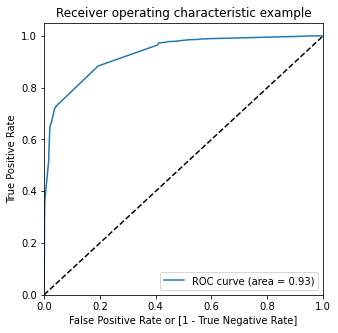

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Inferences:** 
 - The ROC Curve should be a value close to 1. We are getting value of **0.93** indicating a good predictive model.

### 9.2 Finding Optimal Cutoff Point

**Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.377942,0,1,1,1,1,0,0,0,0,0,0
1,0,0.148272,0,1,1,0,0,0,0,0,0,0,0
2,0,0.002142,0,1,0,0,0,0,0,0,0,0,0
3,1,0.909332,1,1,1,1,1,1,1,1,1,1,1
4,1,0.983451,1,1,1,1,1,1,1,1,1,1,1


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.722406  0.975470  0.563892
0.2   0.2  0.736892  0.973426  0.588732
0.3   0.3  0.836246  0.882666  0.807170
0.4   0.4  0.868367  0.730581  0.954673
0.5   0.5  0.868367  0.726492  0.957234
0.6   0.6  0.868682  0.721995  0.960563
0.7   0.7  0.867422  0.715454  0.962612
0.8   0.8  0.854983  0.665576  0.973624
0.9   0.9  0.804440  0.518806  0.983355


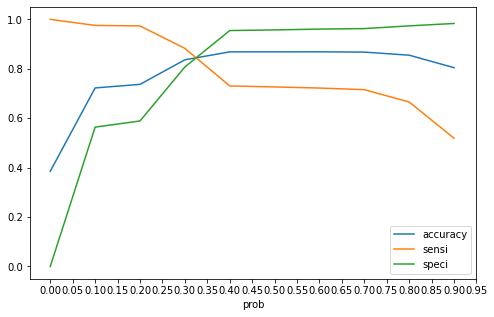

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(8,5))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

**Inferences:** 
 - From the curve above, **`0.33`** is the optimum point to take it as a cutoff probability.

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

### 9.3 Assigning Lead Score

In [116]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.377942,0,1,1,1,1,0,0,0,0,0,0,1,38
1,0,0.148272,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.002142,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.909332,1,1,1,1,1,1,1,1,1,1,1,1,91
4,1,0.983451,1,1,1,1,1,1,1,1,1,1,1,1,98


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8362462604314281

In [118]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3152,  753],
       [ 287, 2159]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
#Calculating sensitivity of our logistic regression model
TP / float(TP+FN)

0.8826655764513491

In [121]:
# Calculating specificity
TN / float(TN+FP)

0.8071702944942382

In [122]:
# Calculate false postive rate - predicting Conversion when lead is not converted
print(FP/ float(TN+FP))

0.19282970550576184


In [123]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7414148351648352


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9165455074149462


**Inferences:**
 - Accuracy of the Model is `84%`
 - Sensitivity of the Model is `88%`
 - Specificity of the Model is `80%`
 - With the Above stats we can see that model build is working well for the Train data

## 10. Precison and Recall

In [125]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9140946502057613

In [126]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7264922322158627

**Using sklearn utilities for the same**

In [127]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9140946502057613

In [128]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7264922322158627

### Precision and Recall Tradeoff

In [129]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

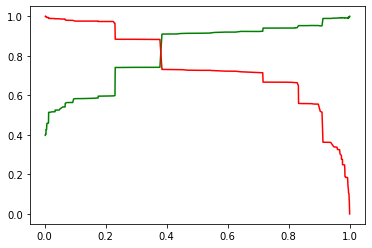

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 11. Making Predictions on the Test Data

In [132]:
X_test[['TotalVisits',
        'Total Time Spent on Website',
        'Page Views Per Visit']] = Scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website',
                                                            'Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0.284772,-0.600595,0.955505,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,0,0.643547,1.887326,1.510766,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1490,0,1,0,0,0,0,0,1,0,0,0,0,1,0
7936,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4216,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3830,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
y_test_pred = result.predict(X_test_sm)

In [136]:
y_test_pred[:10]

3271    0.230539
1490    0.897245
7936    0.230539
4216    0.999356
3830    0.377942
1800    0.897245
6507    0.067031
4821    0.012719
4223    0.967489
4714    0.230539
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

,0
3271,0.230539
1490,0.897245
7936,0.230539
4216,0.999356
3830,0.377942


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,0
0,0,0.230539
1,1,0.897245
2,0,0.230539
3,1,0.999356
4,0,0.377942


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.230539
1,1,0.897245
2,0,0.230539
3,1,0.999356
4,0,0.377942


In [144]:
# Making prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.230539,0
1,1,0.897245,1
2,0,0.230539,0
3,1,0.999356,1
4,0,0.377942,0


In [145]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8542049210429673

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1633,  101],
       [ 296,  693]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7007077856420627

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.941753171856978

## 12. Conclusion
***
So Looking at the Final Model we can conclude that below are the factors that contribute the most in getting a lead converted
 - Lot of focus should be made to leads with current status of lead being 
     - `BUSY`
     - `CLOSED BY HORIZZON`
     - `RINGING`
     - `LOST TO`
     - `WILL REVERT AFTER READING EMAIL`
 - Another focus point should be the Lead Source `WEBLINGAK WEBSITE` and Lead Origin `LEAD ADD FORM`
 - People having Current Occupation as `WORKKING PROFESSIONAL` should be targetd as they are high potential lead source
 - Another are of improvement for better Lead conversion is people with Last Activity `HAD A PHONE CONVERSATION` and Last Notable Activity as `SMS SENT`
 - If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted. In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered for better reach and more number of leads.